In [5]:
from oSLRAU_run import get_data
from spn.structure.leaves.parametric.Parametric import Gaussian, In_Latent
from spn.structure.Base import Context
from spn.algorithms.LearningWrappers import learn_parametric
from spn.io.Graphics import plot_spn
import numpy as np
from spn.algorithms.Inference import log_likelihood
from sklearn.model_selection import train_test_split
from spn.algorithms.oSLRAU import oSLRAU, oSLRAUParams
from spn.algorithms.RSPN import RSPN
from spn.algorithms.TransformStructure import Prune ,Prune_oSLRAU

<h1> oSLRAU approach</h1>

In [3]:
update_after_no_min_batches = 5
prune_after = 5

In [4]:
dataset = "datasets/movement_libras.csv"
dataset = "datasets/Hill_Valley_without_noise_Training.csv"

In [5]:
data = get_data("hill") # load data as an np ndarray
train_data, test_data = train_test_split(data, test_size=0.33, random_state=42)

print(test_data.shape)

==>> data.shape: (606, 101)
==>> data: [[1.31726579e+03 1.31522095e+03 1.31277058e+03 ... 1.32757615e+03
  1.32757622e+03 0.00000000e+00]
 [7.32996762e+03 7.37990744e+03 7.44179923e+03 ... 7.12130033e+03
  7.12130032e+03 1.00000000e+00]
 [8.09421410e+02 8.09780119e+02 8.10207191e+02 ... 8.07540937e+02
  8.07540656e+02 1.00000000e+00]
 ...
 [1.01497011e+03 1.01497011e+03 1.01497011e+03 ... 1.03891641e+03
  1.03398229e+03 1.00000000e+00]
 [7.87003160e+03 7.87003151e+03 7.87003139e+03 ... 7.86997341e+03
  7.86998687e+03 0.00000000e+00]
 [9.45923100e+01 9.45923101e+01 9.45923101e+01 ... 9.48540212e+01
  9.48003830e+01 1.00000000e+00]]
[[1.31726579e+03 1.31522095e+03 1.31277058e+03 ... 1.32757615e+03
  1.32757622e+03 0.00000000e+00]
 [7.32996762e+03 7.37990744e+03 7.44179923e+03 ... 7.12130033e+03
  7.12130032e+03 1.00000000e+00]
 [8.09421410e+02 8.09780119e+02 8.10207191e+02 ... 8.07540937e+02
  8.07540656e+02 1.00000000e+00]
 ...
 [8.43115787e+02 8.43115784e+02 8.43115780e+02 ... 8.424458

In [6]:
print(data.shape)

(605, 101)


101
log likelihood: -1138.6849263573552


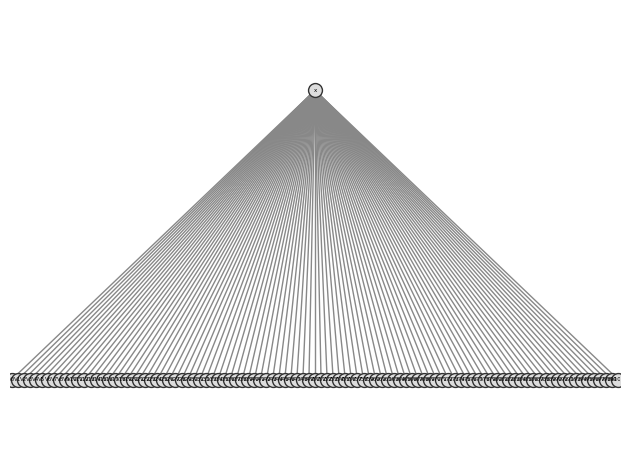

In [11]:
# make first mini_batch from data
mini_batch_size = 10
first_mini_batch = data[0:mini_batch_size]

n = first_mini_batch.shape[1]  # num of variables 
print(n)
context = [Gaussian] * n
ds_context = Context(parametric_types=context).add_domains(first_mini_batch)

# Learn initial spn 
spn = learn_parametric(first_mini_batch, ds_context)

# You can plot and get the log likelihood on some test data
plot_spn(spn, 'intitial_spn.pdf')
print(f"log likelihood: {np.mean(log_likelihood(spn, test_data))}")

In [12]:
oSLRAU_params = oSLRAUParams(mergebatch_threshold=128, corrthresh=0.5, mvmaxscope=1, equalweight=True, currVals=True)

data.shape[0]: 605
mini_batch_size: 10
no_of_minibatches: 60
5
10
15
20
25
30
35
40
45
50
55
log likelihood: -1127.0249728293784


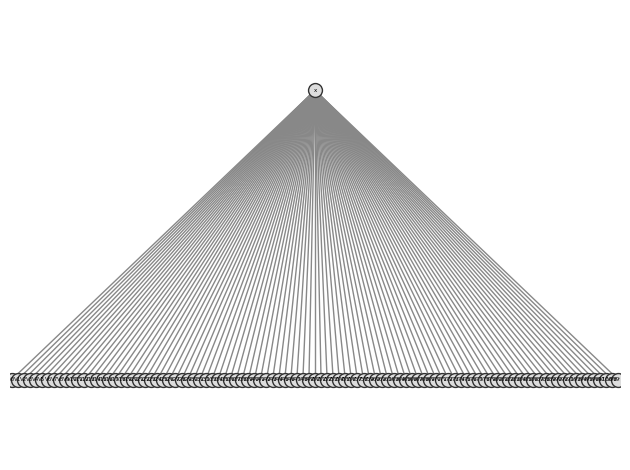

In [13]:
no_of_minibatches = int(data.shape[0] / mini_batch_size)
print(f"data.shape[0]: {data.shape[0]}")
print(f"mini_batch_size: {mini_batch_size}")


print(f"no_of_minibatches: {no_of_minibatches}")

# update using oSLRAU
for i in range(1, no_of_minibatches):
    mini_batch = data[i * mini_batch_size: (i+1) * mini_batch_size]

    update_structure = False
    if i % update_after_no_min_batches == 0:
        print(i)
        update_structure = True
    spn = oSLRAU(spn, mini_batch, oSLRAU_params, update_structure)

    if i % prune_after == 0:
        spn = Prune_oSLRAU(spn)
        
# Use SPFlow modules for analysis on the learned sturcture
print(f"log likelihood: {np.mean(log_likelihood(spn, test_data))}")
plot_spn(spn, 'final_spn.pdf')

<h1> Test on Synthetic data</h1>

In [30]:
import numpy as np

def sample_from_normal(mean, std_dev):
    return np.random.normal(mean, std_dev)

def sample_from_distribution():
    u = np.random.rand()

    if u < 0.25:
        x1 = sample_from_normal(1, 1)
        x2 = sample_from_normal(2, 2)
    elif u < 0.5:
        x1 = sample_from_normal(11, 1)
        x2 = sample_from_normal(12, 2)
    elif u < 0.75:
        x1 = sample_from_normal(21, 1)
        x2 = sample_from_normal(22, 2)
    else:
        x1 = sample_from_normal(31, 1)
        x2 = sample_from_normal(32, 2)

    x3 = sample_from_normal(3, 3)

    return x1, x2, x3

# Example usage:

num_samples = 500
samples_500 = [sample_from_distribution() for _ in range(num_samples)]




In [28]:
import matplotlib.pyplot as plt

# Example usage:


def plot_sample(sample):

# Extract the first two variables from the samples
    x1_values = [sample[0] for sample in samples]
    x2_values = [sample[1] for sample in samples]
    
    # Create a scatter plot
    plt.scatter(x2_values, x1_values)
    plt.xlabel('X2')
    plt.ylabel('X1')
    plt.title('Scatter Plot of X2 vs X1')
    plt.grid(True)
    plt.show()


<h2> 200 samples</h2>

In [37]:
samples_200 = np.array([sample_from_distribution() for _ in range(200)])

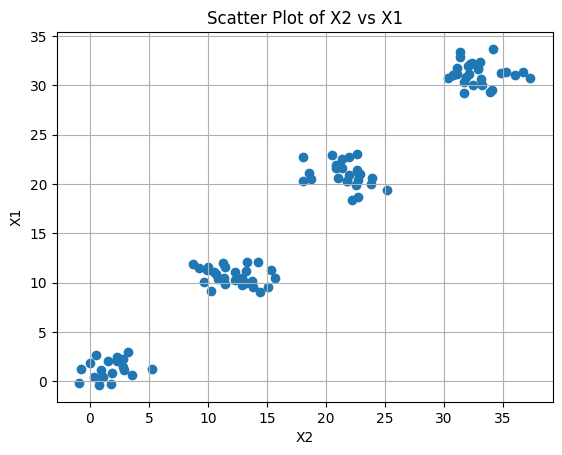

In [38]:
plot_sample(samples_200)

In [127]:
minibatch_size= 10
context = [Gaussian] * 3
first_batch = samples_200[:minibatch_size]
ds_context = Context(parametric_types=context).add_domains(first_batch)

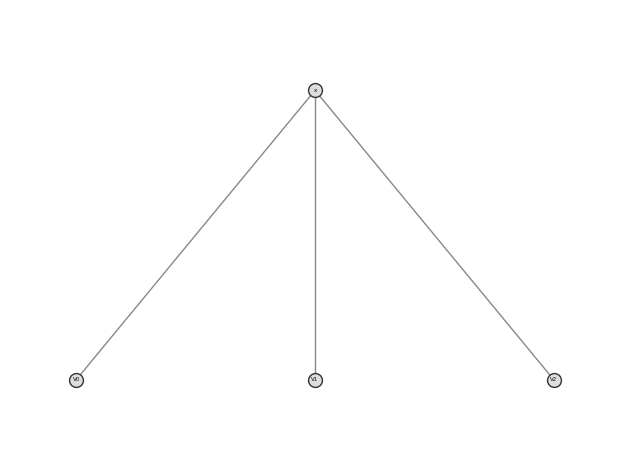

In [128]:
spn_200 = learn_parametric(first_batch, ds_context)

# You can plot and get the log likelihood on some test data
plot_spn(spn_200, 'intitial_spn.pdf')

In [129]:
# oSLRAU_params = oSLRAUParams(mergebatch_threshold=128, corrthresh=0.1, mvmaxscope=1, equalweight=True, currVals=True)

oSLRAU_params = oSLRAUParams(mergebatch_threshold=100, corrthresh=0.1, mvmaxscope=1, equalweight=True, currVals=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
log likelihood: -1127.0441451848799


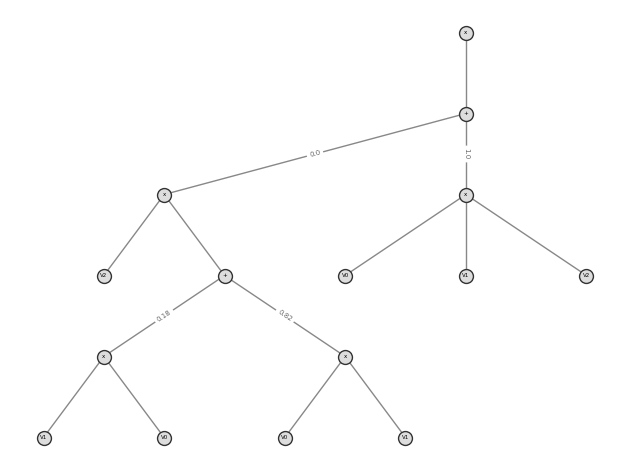

In [130]:
no_of_minibatches = int(200 / 10)
update_after_no_min_batches = 1
prune_after = 2


for i in range(1, no_of_minibatches):
    mini_batch = data[i * mini_batch_size: (i+1) * mini_batch_size]

    update_structure = False
    if i % update_after_no_min_batches == 0:
        print(i)
        update_structure = True
    spn_200 = oSLRAU(spn_200, mini_batch, oSLRAU_params, update_structure)

    if i % prune_after == 0:
        spn = Prune_oSLRAU(spn)
        
# Use SPFlow modules for analysis on the learned sturcture
print(f"log likelihood: {np.mean(log_likelihood(spn, test_data))}")
plot_spn(spn_200, 'final_spn.pdf')

In [131]:
from spn.io.Text import spn_to_str_equation
txt = spn_to_str_equation(spn_200)
print(txt)

((0.003125*((Gaussian(V2|mean=10516.06903227902;stdev=23901.448504891607) * (0.175*((Gaussian(V1|mean=9769.825080192713;stdev=23025.456039496392) * Gaussian(V0|mean=9772.292691964338;stdev=23021.4746985738))) + 0.825*((Gaussian(V0|mean=13174.574596038308;stdev=26536.961440003517) * Gaussian(V1|mean=13172.592592328197;stdev=26536.29849833836)))))) + 0.996875*((Gaussian(V0|mean=7722.6204403050915;stdev=16801.92494931146) * Gaussian(V1|mean=7721.083687623224;stdev=16805.831135396398) * Gaussian(V2|mean=7719.325404748081;stdev=16810.71332228389)))))


<h1> oSLRAU approach with RSPN</h1>

In [29]:
update_after_no_min_batches = 5
prune_after = 5

In [30]:
dataset = "datasets/movement_libras.csv"
dataset = "datasets/Hill_Valley_without_noise_Training.csv"

In [36]:
%%capture
data = get_data("libras") # load data as an np ndarray
data_len = len(data)
train_data, test_data = train_test_split(data, test_size=0.33, random_state=42)



In [32]:
num_variables = 91
num_latent_variables = 2
num_latent_values = 2
unroll = 'backward'
full_update = False
update_leaves = True
len_sequence_varies = False
oSLRAU_params = oSLRAUParams(mergebatch_threshold=128, corrthresh=0.1, mvmaxscope=1, equalweight=True, currVals=True)

In [33]:
rspn = RSPN(num_variables=num_variables, num_latent_variables=num_latent_variables, num_latent_values=num_latent_values)

(358, 91)
(7, 91)
91
Building initial spn
Building initial template spn
Building top spn
Length of the sequence in mini_batch: 1
Evaluating rspn bottom up
-inf


/Users/dariyankhan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Work (one drive)/Imperial/MIT/exchange_year/summer-UROP-knowledge-distillation/policy_stuff/policy-learn/policy-venv_new/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


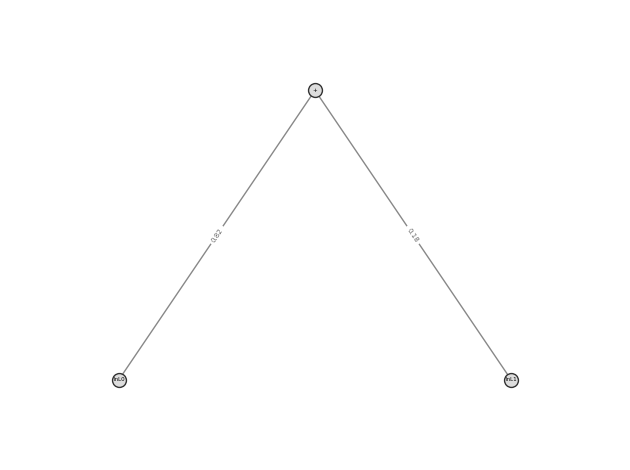

In [34]:
# make first mini_batch from data
mini_batch_size = 7

print(data.shape)

first_mini_batch = train_data[0:mini_batch_size]

print(first_mini_batch.shape)

# num of variables in each time step
n = first_mini_batch.shape[1]  # account for change in the type of data, if length os sequence varies
print(n)
context = [Gaussian] * n
ds_context = Context(parametric_types=context).add_domains(first_mini_batch[:, :num_variables])

# Build initial template
spn, initial_template_spn, top_spn = rspn.build_initial_template(first_mini_batch, ds_context, len_sequence_varies)

# You can plot and get the log likelihood on some test data
plot_spn(spn, 'rspn_initial_spn.pdf')
plot_spn(initial_template_spn, 'rspn_initial_template_spn.pdf')
plot_spn(top_spn, 'rspn_top_spn.pdf')

print(np.mean(rspn.log_likelihood(test_data, unroll, len_sequence_varies=False)))

51
5
Updating template spn
10
Updating template spn
15
Updating template spn
20
Updating template spn
25
Updating template spn
30
Updating template spn
35
Updating template spn
40
Updating template spn
45
Updating template spn
50
Updating template spn
Length of the sequence in mini_batch: 1
Evaluating rspn bottom up
1.8577007319743106


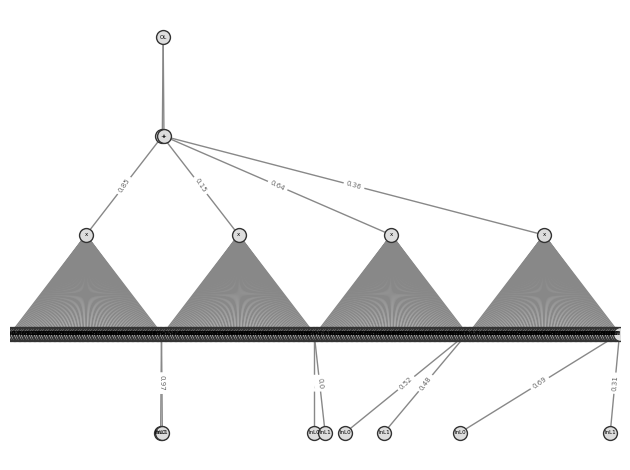

In [35]:
no_of_minibatches = int(data.shape[0] / mini_batch_size)  # account for change in the type of data, if length os sequence varies
print(no_of_minibatches)


# update using oSLRAU
for i in range(1, no_of_minibatches):
    mini_batch = train_data[i * mini_batch_size: (i+1) * mini_batch_size]

    update_template = False
    if i % update_after_no_min_batches == 0:
        print(i)
        update_template = True

    template_spn = rspn.learn_rspn(mini_batch, update_template, oSLRAU_params, unroll, full_update, update_leaves,
                                   len_sequence_varies)
       
        
# You can plot and get the log likelihood on some test data
plot_spn(template_spn, 'rspn_final_template.pdf')
print(np.mean(rspn.log_likelihood(test_data, unroll, len_sequence_varies)))


<h2> RSPN train function</h2>

In [33]:
from oSLRAU_run import get_data
from spn.structure.leaves.parametric.Parametric import Gaussian, In_Latent
from spn.structure.Base import Context
from spn.algorithms.LearningWrappers import learn_parametric
from spn.io.Graphics import plot_spn
import numpy as np
from spn.algorithms.Inference import log_likelihood
from sklearn.model_selection import train_test_split
from spn.algorithms.oSLRAU import oSLRAU, oSLRAUParams
from spn.algorithms.RSPN import RSPN
from spn.algorithms.TransformStructure import Prune ,Prune_oSLRAU

In [34]:
num_variables = 91
num_latent_variables = 2
num_latent_values = 1
unroll = 'backward'
full_update = False
update_leaves = True
len_sequence_varies = False
oSLRAU_params = oSLRAUParams(mergebatch_threshold=10, corrthresh=0.3, mvmaxscope=1, equalweight=True, currVals=True)

In [49]:
num_variables = 91
num_latent_variables = 2
num_latent_values = 1
unroll = 'backward'
full_update = False
update_leaves = True
len_sequence_varies = False
oSLRAU_params = oSLRAUParams(mergebatch_threshold=10, corrthresh=0.3, mvmaxscope=1, equalweight=True, currVals=True)

data = get_data("libras") 

mini_batch_size = 4
update_after_no_min_batches = 2
from sklearn.model_selection import KFold

def train_rspn(train_data, test_data):
    print(f"len(train_data): {len(train_data)}")
    rspn = RSPN(num_variables=num_variables, num_latent_variables=num_latent_variables, num_latent_values=num_latent_values)
    first_mini_batch = train_data[0:mini_batch_size]

    #first batch
    
    # num of variables in each time step
    n = first_mini_batch.shape[1]  # account for change in the type of data, if length os sequence varies
    print(n)
    context = [Gaussian] * n
    ds_context = Context(parametric_types=context).add_domains(first_mini_batch[:, :num_variables])
    
    # Build initial template
    spn, initial_template_spn, top_spn = rspn.build_initial_template(first_mini_batch, ds_context, len_sequence_varies)


    #actual training

    no_of_minibatches = int(data.shape[0] / mini_batch_size)

    for i in range(1, no_of_minibatches):
        mini_batch = train_data[i * mini_batch_size: (i+1) * mini_batch_size]
    
        update_template = False
        if i % update_after_no_min_batches == 0:
            print(i)
            update_template = True
    
        template_spn = rspn.learn_rspn(mini_batch, update_template, oSLRAU_params, unroll, full_update, update_leaves,
                                       len_sequence_varies)
           
            
    # You can plot and get the log likelihood on some test data
    test_ll = np.mean(rspn.log_likelihood(test_data, unroll, len_sequence_varies))

    del rspn

    return test_ll


def avg_ll(data):
    train_data, test_data = train_test_split(data, test_size=0.33, random_state=42)
    kfold = KFold(n_splits=10, shuffle=True)
    ll_list = []
    print(f"len(data): {len(data)} ")
    #for train_indices, test_indices in kfold.split(data):
    fold_size = int(len(data) / 10)
    for i in range(10):
        train_data, test_data = train_test_split(data, test_size=0.1, random_state=i)
        # fold = data[i*fold_size: (i+1)*fold_size]
        #print(f"len(fold): {len(fold)}")
        # train_data = fold[:2*int(len(fold)//3)]
        # test_data = fold[:-int(len(fold)//3)]

        
        try:
            fold_ll = train_rspn(train_data, train_data)
            
            print(f"fold_ll: {fold_ll}")
            
            ll_list.append(fold_ll)

        except Exception:
            continue
            

    
    average_ll = np.mean(np.array(ll_list))
    print(f" \n\n\n average ll: {average_ll}\n\n\n")
    print(f"num examples: {len(ll_list)}")


    
    


data = get_data("libras") 
avg_ll(data)
        

len(data): 358 
len(train_data): 322
91
Building initial spn
Building initial template spn
Building top spn
2
Updating template spn
4
Updating template spn
6
Updating template spn
8
Updating template spn
10
Updating template spn
12
Updating template spn
14
Updating template spn
16
Updating template spn
18
Updating template spn
20
Updating template spn
22
Updating template spn
24
Updating template spn
26
Updating template spn
28
Updating template spn
30
Updating template spn
32
Updating template spn
34
Updating template spn
36
Updating template spn
38
Updating template spn
40
Updating template spn
42
Updating template spn
44
Updating template spn
46
Updating template spn
48
Updating template spn


/Users/dariyankhan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Work (one drive)/Imperial/MIT/exchange_year/summer-UROP-knowledge-distillation/policy_stuff/policy-learn/policy-venv_new/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


50
Updating template spn
52
Updating template spn
54
Updating template spn
56
Updating template spn
58
Updating template spn
60
Updating template spn
62
Updating template spn
64
Updating template spn
66
Updating template spn
68
Updating template spn
70
Updating template spn
72
Updating template spn
74
Updating template spn
76
Updating template spn
78
Updating template spn
80
Updating template spn
82
Updating template spn
84
Updating template spn
86
Updating template spn
88
Updating template spn
Length of the sequence in mini_batch: 1
Evaluating rspn bottom up
fold_ll: 50.30596745551623
len(train_data): 322
91
Building initial spn
Building initial template spn
Building top spn
2
Updating template spn
4
Updating template spn
6
Updating template spn
8
Updating template spn
10
Updating template spn
12
Updating template spn
14
Updating template spn
16
Updating template spn
18
Updating template spn
20
Updating template spn
22
Updating template spn
24
Updating template spn
26
Updating templat

/Users/dariyankhan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Work (one drive)/Imperial/MIT/exchange_year/summer-UROP-knowledge-distillation/policy_stuff/policy-learn/policy-venv_new/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Updating template spn
4
Updating template spn
6
Updating template spn
8
Updating template spn
10
Updating template spn
12
Updating template spn
14
Updating template spn
16
Updating template spn
18
Updating template spn
20
Updating template spn
22
Updating template spn
24
Updating template spn
26
Updating template spn
28
Updating template spn
30
Updating template spn
32
Updating template spn
34
Updating template spn
36
Updating template spn
38
Updating template spn
40
Updating template spn
42
Updating template spn
44
Updating template spn
46
Updating template spn
48
Updating template spn
50
Updating template spn
52
Updating template spn
54
Updating template spn
56
Updating template spn
58
Updating template spn
len(train_data): 322
91
Building initial spn
Building initial template spn
Building top spn
2
Updating template spn
4
Updating template spn
6
Updating template spn
8
Updating template spn
10
Updating template spn
12
Updating template spn
14
Updating template spn
16
Updating templa

In [99]:
import numpy as np
from hmmlearn import hmm



# Set the mean and standard deviation of the Gaussian distribution
mean0 = 0.0 
std0 = 1.0  

mean1 = 10.0 
std1 = 1.0  

mean2 = 20.0
std2 = 1.0  



# Generate random samples from the Gaussian distribution
num_samples=100000

gen_data = [eval(f"np.random.normal(mean{i%3}, std{i%3})") for i in range(num_samples)]


print(gen_data)



[-1.0797342435036001, 9.482594508010102, 20.147631869048634, -1.1345309661234977, 9.1383846997074, 19.545420523918658, 0.9817956235193878, 11.850496671114426, 20.614925669498078, 0.22742513085829327, 9.372999006140846, 21.257442214858912, -0.717168907906539, 10.704509741683093, 21.29248308850333, 0.6753049291869384, 10.392779439228663, 21.756081972809756, 0.6474865126954097, 8.384932805597167, 20.11052646565493, -1.4481605414606826, 10.935597778501236, 19.95342390648368, -0.6143118411759239, 11.143861825601158, 21.84292117706804, 2.9109289306071804, 10.866794964751223, 19.83963929652554, -0.195393836242069, 10.830989334430882, 20.682448789852327, -0.0559420814280733, 9.024500367550234, 20.2346047351729, 1.8683575486687742, 10.766384047343294, 21.245827811123277, 1.0078371704806381, 9.989358226502763, 19.93157667210203, 1.8820185223538166, 11.949867181865029, 20.367879845579576, 0.8265280865950986, 9.768447989094199, 20.8481572166563, -1.2639835865968039, 9.384376536367332, 21.659278461

In [100]:
n_states = 3  # Number of hidden states (you can adjust this)
model = hmm.GaussianHMM(n_components=n_states)


In [101]:
# Reshape the observations into a 2D array (required by hmmlearn)
X = np.array(gen_data).reshape(-1, 1)

# Fit the model to the data
model.fit(X)

GaussianHMM(n_components=3)

In [102]:
# Transition matrix
transition_matrix = model.transmat_
print("Transition Matrix:")
print(transition_matrix)

# Mean values for each state
means = model.means_
print("State Means:")
print(means)

# Covariance matrices for each state
covars = model.covars_
print("State Covariances:")
print(covars)


Transition Matrix:
[[2.44207436e-151 1.00000000e+000 1.34788714e-219]
 [2.65270074e-077 3.57576167e-056 1.00000000e+000]
 [1.00000000e+000 3.57576167e-056 1.10345279e-087]]
State Means:
[[ 9.99531318e+00]
 [ 1.99943554e+01]
 [-5.33970280e-03]]
State Covariances:
[[[1.00669244]]

 [[1.00124283]]

 [[1.00198245]]]


In [103]:
model.sample(5)

(array([[ 0.14138842],
        [10.65565328],
        [21.54941077],
        [ 0.05909127],
        [ 9.23221541]]),
 array([2, 0, 1, 2, 0]))

In [158]:
%%capture
sequences = [model.sample(30)[0] for _ in range(5)]
sequences

In [216]:
def hmm_avg_ll(hmm_model, data_seq):
    log_likelihoods = []

    for sequence in data_seq:
        log_likelihood = hmm_model.score(sequence)
        log_likelihoods.append(log_likelihood)

    return np.mean(log_likelihoods)

In [162]:
most_likely = np.array([0.0, 10.0, 20.0]*10)
model.score(most_likely.reshape(-1, 1))

-27.618029923821112

<h1> Fit RSPN to HMM data</h1>

In [212]:
from sklearn.model_selection import KFold
prune_after = 5

def train_rspn(train_data, test_data, rspn=None):

    if len(train_data.shape) == 3: train_data = np.squeeze(train_data)
    if len(test_data.shape) == 3: test_data = np.squeeze(test_data)

    if rspn is None:
    
        rspn = RSPN(num_variables=num_variables, num_latent_variables=num_latent_variables, num_latent_values=num_latent_values)
    
        
        
        first_mini_batch = train_data[0:mini_batch_size]
        
    
        #first batch
        
        # num of variables in each time step
        n = first_mini_batch.shape[1]  # account for change in the type of data, if length os sequence varies
        print(n)
        context = [Gaussian] * n
        print(num_variables)
    
        
        ds_context = Context(parametric_types=context).add_domains(first_mini_batch[:, :num_variables])
        
        # Build initial template
        spn, initial_template_spn, top_spn = rspn.build_initial_template(first_mini_batch, ds_context, len_sequence_varies)


    #actual training

    no_of_minibatches = int(data.shape[0] / mini_batch_size)

    print(no_of_minibatches)


    for i in range(1, no_of_minibatches):
        mini_batch = train_data[i * mini_batch_size: (i+1) * mini_batch_size]
    
        update_template = False
        if i % update_after_no_min_batches == 0:
            print(i)
            update_template = True

        if i % prune_after == 0:
            pass
            # rspn = Prune_oSLRAU(rspn)
    
        template_spn = rspn.learn_rspn(mini_batch, update_template, oSLRAU_params, unroll, full_update, update_leaves,
                                       len_sequence_varies)
           
            
    # You can plot and get the log likelihood on some test data
    test_ll = np.mean(rspn.log_likelihood(test_data, unroll, len_sequence_varies))


    return test_ll, rspn, template_spn, initial_template_spn


def avg_ll(data):
    #train_data, test_data = train_test_split(data, test_size=0.33, random_state=42)
    kfold = KFold(n_splits=10, shuffle=True)
    ll_list = []
    print(f"len(data): {len(data)} ")
    #for train_indices, test_indices in kfold.split(data):
    fold_size = int(len(data) / 10)
    rspn=None
    for i in range(1):
        train_data, test_data= train_test_split(data, test_size=0.1, random_state=42)

        
        #try:
        fold_ll, rspn, template_spn, initial_template_spn = train_rspn(train_data, test_data, rspn)
        
        print(f"fold_ll: {fold_ll}")
        
        ll_list.append(fold_ll)

        #except Exception:
            #continue
            

    
    average_ll = np.mean(np.array(ll_list))
    print(f" \n\n\n average ll: {average_ll}\n\n\n")
    print(f"num examples: {len(ll_list)}")

    plot_spn(template_spn, 'rspn_final_template.pdf')

    
    return rspn
        

In [213]:
best_ll_data = np.array([[0.0, 10.0, 20.0]*10 for _ in range(200)])

hmm_ll: -2.8066936997172705
len(data): 12 
2
2
Building initial spn
Building initial template spn
Building top spn
4
Length of the sequence in mini_batch: 1
Evaluating rspn bottom up
fold_ll: -2.458137206617538
 


 average ll: -2.458137206617538



num examples: 1


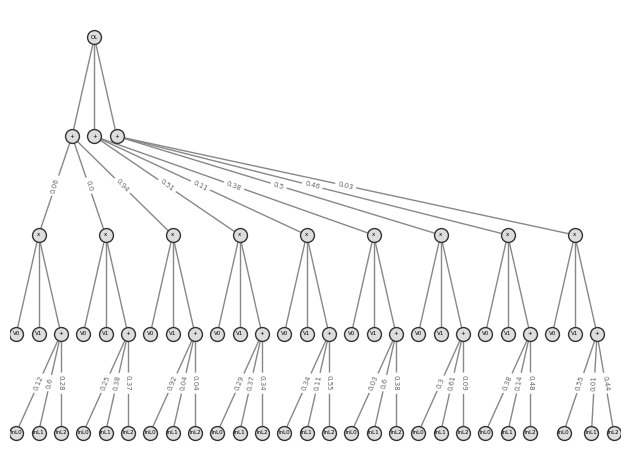

In [218]:
num_variables = 2
num_latent_variables = 3
num_latent_values = 3
unroll = 'backward'
full_update = False
update_leaves = True
len_sequence_varies = False
oSLRAU_params = oSLRAUParams(mergebatch_threshold=100, corrthresh=0.7, mvmaxscope=1, equalweight=True, currVals=True)


mini_batch_size = 3
update_after_no_min_batches = 10



data = np.array([model.sample(2)[0] for _ in range(12)])

hmm_ll = hmm_avg_ll(model, data)
print(f"hmm_ll: {hmm_ll}")


rspn = avg_ll(data)




